# DataSet

In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt
import math

tr_imag_idx3 = 'train-images.idx3-ubyte'
tr_label_idx1 = 'train-labels.idx1-ubyte'

ts_imag_idx3 = 't10k-images.idx3-ubyte'
ts_label_idx1 = 't10k-labels.idx1-ubyte'

In [2]:
def decode_idx3(idx3_file):
    # read 二進位
    bin_data = open(idx3_file, 'rb').read()

    # 解析文件头信息，依次为魔数、图片数量、每张图片高、每张图片宽
    offset = 0
    fmt_header = '>iiii'
    magic_number, num_images, num_rows, num_cols = struct.unpack_from(fmt_header, bin_data, offset)

    # 解析dataset
    image_size = num_rows * num_cols
    offset += struct.calcsize(fmt_header)
    fmt_image = '>' + str(image_size) + 'B'
    images = np.empty((num_images, num_rows, num_cols))
    for i in range(num_images):
        images[i] = np.array(struct.unpack_from(fmt_image, bin_data, offset)).reshape((num_rows, num_cols))
        offset += struct.calcsize(fmt_image)
    return images

def decode_idx1(idx1_file):
    # read 二進位
    bin_data = open(idx1_file, 'rb').read()

    # 解析文件头信息，依次为魔数和标签数
    offset = 0
    fmt_header = '>ii'
    magic_number, num_images = struct.unpack_from(fmt_header, bin_data, offset)

    # 解析dataset
    offset += struct.calcsize(fmt_header)
    fmt_image = '>B'
    labels = np.empty(num_images)
    for i in range(num_images):
        labels[i] = struct.unpack_from(fmt_image, bin_data, offset)[0]
        offset += struct.calcsize(fmt_image)
    return labels

def load_train_imag(file=tr_imag_idx3):
     return decode_idx3(file)
def load_train_label(file=tr_label_idx1):
    return decode_idx1(file)
def load_test_imag(file=ts_imag_idx3):
    return decode_idx3(file)
def load_test_label(file=ts_label_idx1):
    return decode_idx1(file)

In [3]:
train_imag = load_train_imag()
train_label = load_train_label()
test_imag = load_test_imag()
test_label = load_test_label()

def CheckData():
    # 查看前十个數據及其標籤已讀取是否正確
    for i in range(10):
        print (train_label[i]) #數值
        plt.imshow(train_imag[i], cmap='gray')
        plt.show()
        print (train_imag[i]) #array

5.0


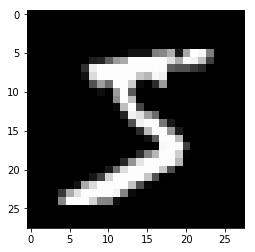

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

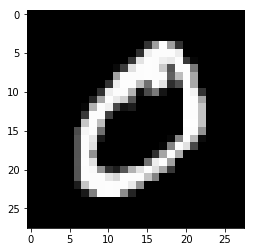

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
  227. 253. 252. 239. 233. 252.  57.   6.   0.   0.   0.  

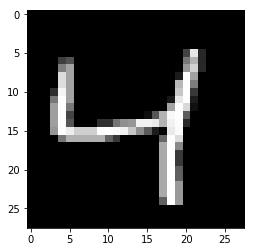

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.  67. 232.  39.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  62.  81.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0. 120. 180.  39.   0.   0.  

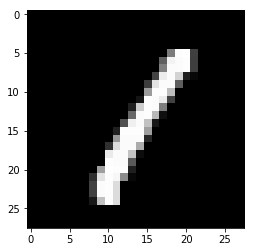

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0. 124. 253. 255.  63.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.  96. 244. 251. 253.  62.   0.   0.   0.  

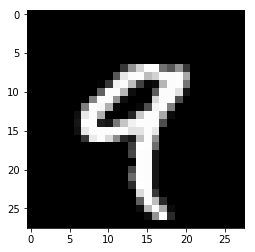

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  

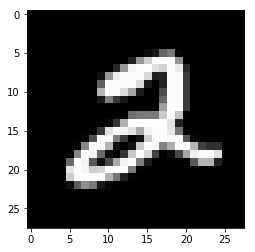

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.  13.  25. 100. 122.   7.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  33.
  151. 208. 252. 252. 252. 146.   0.   0.   0.   0.   0.  

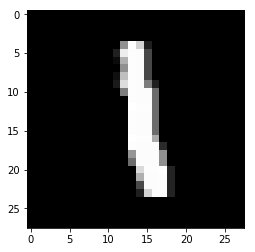

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 145. 255.
  211.  31.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  32. 237. 253.
  252.  71.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  11. 175. 253.
  252.  71.   0.   0.   0.   0.   0.   0.   0.   0.   0.  

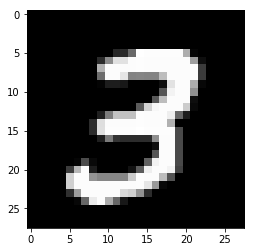

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  38.  43. 105.
  255. 253. 253. 253. 253. 253. 174.   6.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  43. 139. 224. 226. 252.
  253. 252. 252. 252. 252. 252. 252. 158.  14.   0.   0.  

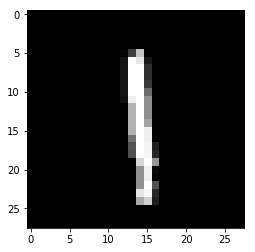

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   5.  63.
  197.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  20. 254.
  230.  24.   0.   0.   0.   0.   0.   0.   0.   0.   0.  

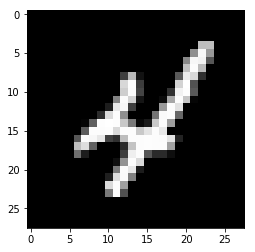

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0. 189. 190.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0. 143. 247. 153.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0. 136. 247. 242.  86.   0.  

In [7]:
CheckData()

# Discrete

# Train

In [48]:
print (train_label)

[5. 0. 4. ... 5. 6. 8.]


。 分類0-9 List

In [4]:
arr0 = []
arr1 = []
arr2 = []
arr3 = []
arr4 = []
arr5 = []
arr6 = []
arr7 = []
arr8 = []
arr9 = []
for x in range(len(train_label)):
    if train_label[x] == 0:
        arr0.append(x)
    elif train_label[x] == 1:
        arr1.append(x)
    elif train_label[x] == 2:
        arr2.append(x)
    elif train_label[x] == 3:
        arr3.append(x)
    elif train_label[x] == 4:
        arr4.append(x)
    elif train_label[x] == 5:
        arr5.append(x)
    elif train_label[x] == 6:
        arr6.append(x)
    elif train_label[x] == 7:
        arr7.append(x)
    elif train_label[x] == 8:
        arr8.append(x)
    else:
        arr9.append(x)
    x += 1  

。 展開image : len(arr0)*784

In [5]:
train_imag00 = np.zeros(shape=(len(arr0), 784))
train_imag01 = np.zeros(shape=(len(arr1), 784))
train_imag02 = np.zeros(shape=(len(arr2), 784))
train_imag03 = np.zeros(shape=(len(arr3), 784))
train_imag04 = np.zeros(shape=(len(arr4), 784))
train_imag05 = np.zeros(shape=(len(arr5), 784))
train_imag06 = np.zeros(shape=(len(arr6), 784))
train_imag07 = np.zeros(shape=(len(arr7), 784))
train_imag08 = np.zeros(shape=(len(arr8), 784))
train_imag09 = np.zeros(shape=(len(arr9), 784))
i0 = 0
i1 = 0
i2 = 0
i3 = 0
i4 = 0
i5 = 0
i6 = 0
i7 = 0
i8 = 0
i9 = 0
for i in arr0:
    train_imag00[i0] = train_imag[i].reshape(1,784)
    i0 += 1
for i in range(0,256,8):
    train_imag00[np.where((train_imag00 >= i)&(train_imag00 < i+8))] = (i/8)+1 #bin32

for i in arr1:
    train_imag01[i1] = train_imag[i].reshape(1,784)
    i1 += 1
for i in range(0,256,8):
    train_imag01[np.where((train_imag01 >= i)&(train_imag01 < i+8))] = (i/8)+1 #bin32

for i in arr2:
    train_imag02[i2] = train_imag[i].reshape(1,784)
    i2 += 1
for i in range(0,256,8):
    train_imag02[np.where((train_imag02 >= i)&(train_imag02 < i+8))] = (i/8)+1 #bin32

for i in arr3:
    train_imag03[i3] = train_imag[i].reshape(1,784)
    i3 += 1
for i in range(0,256,8):
    train_imag03[np.where((train_imag03 >= i)&(train_imag03 < i+8))] = (i/8)+1 #bin32

for i in arr4:
    train_imag04[i4] = train_imag[i].reshape(1,784)
    i4 += 1
for i in range(0,256,8):
    train_imag04[np.where((train_imag04 >= i)&(train_imag04 < i+8))] = (i/8)+1 #bin32

for i in arr5:
    train_imag05[i5] = train_imag[i].reshape(1,784)
    i5 += 1
for i in range(0,256,8):
    train_imag05[np.where((train_imag05 >= i)&(train_imag05 < i+8))] = (i/8)+1 #bin32

for i in arr6:
    train_imag06[i6] = train_imag[i].reshape(1,784)
    i6 += 1
for i in range(0,256,8):
    train_imag06[np.where((train_imag06 >= i)&(train_imag06 < i+8))] = (i/8)+1 #bin32

for i in arr7:
    train_imag07[i7] = train_imag[i].reshape(1,784)
    i7 += 1
for i in range(0,256,8):
    train_imag07[np.where((train_imag07 >= i)&(train_imag07 < i+8))] = (i/8)+1 #bin32

for i in arr8:
    train_imag08[i8] = train_imag[i].reshape(1,784)
    i8 += 1
for i in range(0,256,8):
    train_imag08[np.where((train_imag08 >= i)&(train_imag08 < i+8))] = (i/8)+1 #bin32

for i in arr9:
    train_imag09[i9] = train_imag[i].reshape(1,784)
    i9 += 1
for i in range(0,256,8):
    train_imag09[np.where((train_imag09 >= i)&(train_imag09 < i+8))] = (i/8)+1 #bin32


。 先收集各class的mean 畫圖用

In [6]:
tr_m = np.zeros(shape=(10, 1, 784))

tr_m[0] = train_imag00.mean(axis=0)
tr_m[1] = train_imag01.mean(axis=0)
tr_m[2] = train_imag02.mean(axis=0)
tr_m[3] = train_imag03.mean(axis=0)
tr_m[4] = train_imag04.mean(axis=0)
tr_m[5] = train_imag05.mean(axis=0)
tr_m[6] = train_imag06.mean(axis=0)
tr_m[7] = train_imag07.mean(axis=0)
tr_m[8] = train_imag08.mean(axis=0)
tr_m[9] = train_imag09.mean(axis=0)

# Test

In [7]:
import time
import pandas as pd
errD = 0
OutputD = np.repeat(0, 12)
ARR = np.array([0,1,2,3,4,5,6,7,8,9])
ts00 = np.zeros(shape=(28, 28))

tStart = time.time()#計時開始
for xx in range(10000):
    ts00 = test_imag[xx]
    ts00 = ts00.reshape(1,784) #1*784
    for i in range(0,256,8):
        ts00[np.where((ts00 >= i)&(ts00 < i+8))] = (i/8)+1 #32bin
    
    # find posterior
    summ = 0 
    for i in range(784):
        summa = math.log((np.sum(train_imag00[:,i] == ts00[0,i])+ 1e-10) / len(arr0))
        summ = summ + summa
    summ_f = float(summ)
    posterior0 = math.log((len(arr0)/60000))+(summ_f)
    ARR[0] = posterior0
    #print('posterior_log_0:',posterior0)
    
    summ = 0
    for i in range(784):
        summa = math.log((np.sum(train_imag01[:,i] == ts00[0,i])+ 1e-10) / len(arr1))
        summ = summ + summa
    summ_f = float(summ)
    posterior1 = math.log((len(arr1)/60000))+(summ_f)
    ARR[1] = posterior1 
    #print('posterior_1:',posterior1)
    
    summ = 0
    for i in range(784):
        summa = math.log((np.sum(train_imag02[:,i] == ts00[0,i])+ 1e-10) / len(arr2))
        summ = summ + summa
    summ_f = float(summ)
    posterior2 = math.log((len(arr2)/60000))+(summ_f)
    ARR[2] = posterior2 
    #print('posterior_2:',posterior2)
    
    summ = 0
    for i in range(784):
        summa = math.log((np.sum(train_imag03[:,i] == ts00[0,i])+ 1e-10) / len(arr3))
        summ = summ + summa
    summ_f = float(summ)
    posterior3 = math.log((len(arr3)/60000))+(summ_f)
    ARR[3] = posterior3 
    #print('posterior_3:',posterior3)
    
    summ = 0
    for i in range(784):
        summa = math.log((np.sum(train_imag04[:,i] == ts00[0,i])+ 1e-10) / len(arr4))
        summ = summ + summa
    summ_f = float(summ)
    posterior4 = math.log((len(arr4)/60000))+(summ_f)
    ARR[4] = posterior4 
    #print('posterior_4:',posterior4)
    
    summ = 0
    for i in range(784):
        summa = math.log((np.sum(train_imag05[:,i] == ts00[0,i])+ 1e-10) / len(arr5))
        summ = summ + summa
    summ_f = float(summ)
    posterior5 = math.log((len(arr5)/60000))+(summ_f)
    ARR[5] = posterior5 
    #print('posterior_5:',posterior5)
    
    summ = 0
    for i in range(784):
        summa = math.log((np.sum(train_imag06[:,i] == ts00[0,i])+ 1e-10) / len(arr6))
        summ = summ + summa
    summ_f = float(summ)
    posterior6 = math.log((len(arr6)/60000))+(summ_f)
    ARR[6] = posterior6 
    #print('posterior_6:',posterior6)
    
    summ = 0
    for i in range(784):
        summa = math.log((np.sum(train_imag07[:,i] == ts00[0,i])+ 1e-10) / len(arr7))
        summ = summ + summa
    summ_f = float(summ)
    posterior7 = math.log((len(arr7)/60000))+(summ_f)
    ARR[7] = posterior7 
    #print('posterior_7:',posterior7)
    
    summ = 0
    for i in range(784):
        summa = math.log((np.sum(train_imag08[:,i] == ts00[0,i])+ 1e-10) / len(arr8))
        summ = summ + summa
    summ_f = float(summ)
    posterior8 = math.log((len(arr8)/60000))+(summ_f)
    ARR[8] = posterior8 
    #print('posterior_8:',posterior8)
    
    summ = 0
    for i in range(784):
        summa = math.log((np.sum(train_imag09[:,i] == ts00[0,i])+ 1e-10) / len(arr9))
        summ = summ + summa
    summ_f = float(summ)
    posterior9 = math.log((len(arr9)/60000))+(summ_f)
    ARR[9] = posterior9
    #print('posterior_9:',posterior9)
    
    ARRR = ARR/np.sum(ARR)
    a = np.argmax(ARR)
    if a != test_label[xx]:
        errD += 1
    c = np.append(ARRR, a)
    c = np.append(c, test_label[xx])
    OutputD = np.row_stack((OutputD,c))
    

tEnd = time.time()#計時結束
print("It cost %f sec" % (tEnd - tStart))
OutputD = np.delete(OutputD,0,axis = 0)
df = pd.DataFrame(OutputD,columns=['class 0','class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','Posterior','Label'])
df.to_excel("Output_Discrete.xlsx")
print(errD/10000)

It cost 3545.727222 sec
0.1512


Discrete


<function matplotlib.pyplot.show(*args, **kw)>

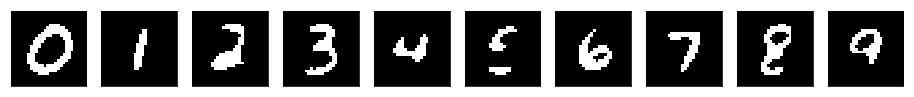

In [133]:
img = np.zeros(shape=(10,28,28))
print('Discrete')
for i in range(10):
      tr_m[i] = (tr_m[i] > 16).astype(int)
img = tr_m.reshape(10,28,28)

fig, arrimg = plt.subplots(1, 10, figsize=(16, 16))
for dic in range(10):
    arrimg[dic].imshow(img[dic],cmap='gray')
    arrimg[dic].axes.get_xaxis().set_visible(False)
    arrimg[dic].axes.get_yaxis().set_visible(False)
plt.show

In [9]:
print('Discrete error : ',errD/10000)

Discrete error :  0.1512


# Continuous

# Train

。 分類0-9 List

In [7]:
arr0 = []
arr1 = []
arr2 = []
arr3 = []
arr4 = []
arr5 = []
arr6 = []
arr7 = []
arr8 = []
arr9 = []
for x in range(len(train_label)):
    if train_label[x] == 0:
        arr0.append(x)
    elif train_label[x] == 1:
        arr1.append(x)
    elif train_label[x] == 2:
        arr2.append(x)
    elif train_label[x] == 3:
        arr3.append(x)
    elif train_label[x] == 4:
        arr4.append(x)
    elif train_label[x] == 5:
        arr5.append(x)
    elif train_label[x] == 6:
        arr6.append(x)
    elif train_label[x] == 7:
        arr7.append(x)
    elif train_label[x] == 8:
        arr8.append(x)
    else:
        arr9.append(x)
    x += 1  

。 展開image : len(arr0)*784

In [8]:
train_imag00 = np.zeros(shape=(len(arr0), 784))
train_imag01 = np.zeros(shape=(len(arr1), 784))
train_imag02 = np.zeros(shape=(len(arr2), 784))
train_imag03 = np.zeros(shape=(len(arr3), 784))
train_imag04 = np.zeros(shape=(len(arr4), 784))
train_imag05 = np.zeros(shape=(len(arr5), 784))
train_imag06 = np.zeros(shape=(len(arr6), 784))
train_imag07 = np.zeros(shape=(len(arr7), 784))
train_imag08 = np.zeros(shape=(len(arr8), 784))
train_imag09 = np.zeros(shape=(len(arr9), 784))
i0 = 0
i1 = 0
i2 = 0
i3 = 0
i4 = 0
i5 = 0
i6 = 0
i7 = 0
i8 = 0
i9 = 0
for i in arr0:
    train_imag00[i0] = train_imag[i].reshape(1,784)
    i0 += 1
for i in arr1:
    train_imag01[i1] = train_imag[i].reshape(1,784)
    i1 += 1
for i in arr2:
    train_imag02[i2] = train_imag[i].reshape(1,784)
    i2 += 1
for i in arr3:
    train_imag03[i3] = train_imag[i].reshape(1,784)
    i3 += 1

for i in arr4:
    train_imag04[i4] = train_imag[i].reshape(1,784)
    i4 += 1
for i in arr5:
    train_imag05[i5] = train_imag[i].reshape(1,784)
    i5 += 1
for i in arr6:
    train_imag06[i6] = train_imag[i].reshape(1,784)
    i6 += 1

for i in arr7:
    train_imag07[i7] = train_imag[i].reshape(1,784)
    i7 += 1
for i in arr8:
    train_imag08[i8] = train_imag[i].reshape(1,784)
    i8 += 1
for i in arr9:
    train_imag09[i9] = train_imag[i].reshape(1,784)
    i9 += 1

。 求Train class 0-9的mean 與varience
    -  ˙每個class中有784個 mean 與var

In [120]:
# mean_list = []
# var_list = []
# arr第一行為mean
# arr第二行為var
tr_mean = np.zeros(shape=(10, 1, 784))

tr_00 = np.zeros(shape=(2, 784))
tr_00[0, :] = train_imag00.mean(axis=0)
tr_mean[0] = tr_00[0, :] 
tr_00[1, :] = train_imag00.var(axis=0)
var0 = sum(tr_00[1, :]) 
tr00 = list(tr_00[1, :])
tr_00[1, np.where(tr_00 == 0)] = np.array(list(filter(None, tr00))).min(axis = 0)

tr_01 = np.zeros(shape=(2, 784))
tr_01[0, :] = train_imag01.mean(axis=0)
tr_mean[1] = tr_01[0, :] 
tr_01[1, :] = train_imag01.var(axis=0)
var1 = sum(tr_01[1, :])
tr01 = list(tr_01[1, :])
tr_01[1, np.where(tr_01 == 0)] = np.array(list(filter(None, tr01))).min(axis = 0)

tr_02 = np.zeros(shape=(2, 784))
tr_02[0, :] = train_imag02.mean(axis=0)
tr_mean[2] = tr_02[0, :] 
tr_02[1, :] = train_imag02.var(axis=0)
var2 = sum(tr_02[1, :])
tr02 = list(tr_02[1, :])
tr_02[1, np.where(tr_02 == 0)] = np.array(list(filter(None, tr02))).min(axis = 0)

tr_03 = np.zeros(shape=(2, 784))
tr_03[0, :] = train_imag03.mean(axis=0)
tr_mean[3] = tr_03[0, :] 
tr_03[1, :] = train_imag03.var(axis=0)
var3 = sum(tr_03[1, :])
tr03 = list(tr_03[1, :])
tr_03[1, np.where(tr_03 == 0)] = np.array(list(filter(None, tr03))).min(axis = 0)

tr_04 = np.zeros(shape=(2, 784))
tr_04[0, :] = train_imag04.mean(axis=0)
tr_mean[4] = tr_04[0, :] 
tr_04[1, :] = train_imag04.var(axis=0)
var4 = sum(tr_04[1, :])
tr04 = list(tr_04[1, :])
tr_04[1, np.where(tr_04 == 0)] = np.array(list(filter(None, tr04))).min(axis = 0)

tr_05 = np.zeros(shape=(2, 784))
tr_05[0, :] = train_imag05.mean(axis=0)
tr_mean[5] = tr_05[0, :] 
tr_05[1, :] = train_imag05.var(axis=0)
var5 = sum(tr_05[1, :])
tr05 = list(tr_05[1, :])
tr_05[1, np.where(tr_05 == 0)] = np.array(list(filter(None, tr05))).min(axis = 0)

tr_06 = np.zeros(shape=(2, 784))
tr_06[0, :] = train_imag06.mean(axis=0)
tr_mean[6] = tr_06[0, :] 
tr_06[1, :] = train_imag06.var(axis=0)
var6 = sum(tr_06[1, :])
tr06 = list(tr_06[1, :])
tr_06[1, np.where(tr_06 == 0)] = np.array(list(filter(None, tr06))).min(axis = 0)

tr_07 = np.zeros(shape=(2, 784))
tr_07[0, :] = train_imag07.mean(axis=0)
tr_mean[7] = tr_07[0, :] 
tr_07[1, :] = train_imag07.var(axis=0)
var7 = sum(tr_07[1, :])
tr07 = list(tr_07[1, :])
tr_07[1, np.where(tr_07 == 0)] = np.array(list(filter(None, tr07))).min(axis = 0)

tr_08 = np.zeros(shape=(2, 784))
tr_08[0, :] = train_imag08.mean(axis=0)
tr_mean[8] = tr_08[0, :] 
tr_08[1, :] = train_imag08.var(axis=0)
var8 = sum(tr_08[1, :])
tr08 = list(tr_08[1, :])
tr_08[1, np.where(tr_08 == 0)] = np.array(list(filter(None, tr08))).min(axis = 0)

tr_09 = np.zeros(shape=(2, 784))
tr_09[0, :] = train_imag09.mean(axis=0)
tr_mean[9] = tr_09[0, :] 
tr_09[1, :] = train_imag09.var(axis=0)
var9 = sum(tr_09[1, :])
tr09 = list(tr_09[1, :])
tr_09[1, np.where(tr_09 == 0)] = np.array(list(filter(None, tr09))).min(axis = 0)

# Test

In [11]:
import time
import pandas as pd

err = 0
Output = np.repeat(0, 12)
ARR = np.array([0,1,2,3,4,5,6,7,8,9])
ts0 = np.zeros(shape=(28, 28))
tStart = time.time()#計時開始

for xx in range(10000):
    ts0 = test_imag[xx]
    ts0 = ts0.reshape(1,784) #1*784
    theta = []
    
    summ = 0
    for ii in range(784):
        summa = np.square(ts0[0, ii]-tr_00[0,ii]) / (2*tr_00[1,ii])
        summ = summ + summa
    for i in range(784):
        a = (-784/2)*math.log(2*math.pi*var0)-summ
        theta.append(a) 
    posterior0 = np.array(theta).max(axis = 0)
    ARR[0] = posterior0 
    #print('posterior_0:',posterior0)

    summ = 0
    for ii in range(784):
        summa = np.square(ts0[0, ii]-tr_01[0,ii]) / (2*tr_01[1,ii])
        summ = summ + summa
    for i in range(784):
        a = (-784/2)*math.log(2*math.pi*var1)-summ
        theta.append(a) 
    posterior1 = np.array(theta).max(axis = 0)
    ARR[1] = posterior1 
    #print('posterior_1:',posterior1)
    
    summ = 0
    for ii in range(784):
        summa = np.square(ts0[0, ii]-tr_02[0,ii]) / (2*tr_02[1,ii])
        summ = summ + summa
    for i in range(784):
        a = (-784/2)*math.log(2*math.pi*var2)-summ
        theta.append(a) 
    posterior2 = np.array(theta).max(axis = 0)
    ARR[2] = posterior2 
    #print('posterior_2:',posterior2)
    
    summ = 0
    for ii in range(784):
        summa = np.square(ts0[0, ii]-tr_03[0,ii]) / (2*tr_03[1,ii])
        summ = summ + summa
    for i in range(784):
        a = (-784/2)*math.log(2*math.pi*var3)-summ
        theta.append(a) 
    posterior3 = np.array(theta).max(axis = 0)
    ARR[3] = posterior3 
    #print('posterior_3:',posterior3)
    
    summ = 0
    for ii in range(784):
        summa = np.square(ts0[0, ii]-tr_04[0,ii]) / (2*tr_04[1,ii])
        summ = summ + summa
    for i in range(784):
        a = (-784/2)*math.log(2*math.pi*var4)-summ
        theta.append(a) 
    posterior4 = np.array(theta).max(axis = 0)
    ARR[4] = posterior4 
    #print('posterior_4:',posterior4)
    
    summ = 0
    for ii in range(784):
        summa = np.square(ts0[0, ii]-tr_05[0,ii]) / (2*tr_05[1,ii])
        summ = summ + summa
    for i in range(784):
        a = (-784/2)*math.log(2*math.pi*var5)-summ
        theta.append(a) 
    posterior5 = np.array(theta).max(axis = 0)
    ARR[5] = posterior5 
    #print('posterior_5:',posterior5)
    
    summ = 0
    for ii in range(784):
        summa = np.square(ts0[0, ii]-tr_06[0,ii]) / (2*tr_06[1,ii])
        summ = summ + summa
    for i in range(784):
        a = (-784/2)*math.log(2*math.pi*var6)-summ
        theta.append(a) 
    posterior6 = np.array(theta).max(axis = 0)
    ARR[6] = posterior6 
    #print('posterior_6:',posterior6)
    
    summ = 0
    for ii in range(784):
        summa = np.square(ts0[0, ii]-tr_07[0,ii]) / (2*tr_07[1,ii])
        summ = summ + summa
    for i in range(784):
        a = (-784/2)*math.log(2*math.pi*var7)-summ
        theta.append(a) 
    posterior7 = np.array(theta).max(axis = 0)
    ARR[7] = posterior7
    #print('posterior_7:',posterior7)
    
    summ = 0
    for ii in range(784):
        summa = np.square(ts0[0, ii]-tr_08[0,ii]) / (2*tr_08[1,ii])
        summ = summ + summa
    for i in range(784):
        a = (-784/2)*math.log(2*math.pi*var8)-summ
        theta.append(a) 
    posterior8 = np.array(theta).max(axis = 0)
    ARR[8] = posterior8
    #print('posterior_8:',posterior8)
    
    summ = 0
    for ii in range(784):
        summa = np.square(ts0[0, ii]-tr_09[0,ii]) / (2*tr_09[1,ii])
        summ = summ + summa
    for i in range(784):
        a = (-784/2)*math.log(2*math.pi*var9)-summ
        theta.append(a) 
    posterior9 = np.array(theta).max(axis = 0)
    ARR[9] = posterior9
    #print('posterior_9:',posterior9)
    
    ARRR = ARR/np.sum(ARR)
    a = np.argmax(ARR)
    if a != test_label[xx]:
        err += 1
    c = np.append(ARRR, a)
    c = np.append(c, test_label[xx])
    Output = np.row_stack((Output,c))
    

tEnd = time.time()#計時結束
print("It cost %f sec" % (tEnd - tStart))
Output = np.delete(Output,0,axis = 0)
df = pd.DataFrame(Output,columns=['class 0','class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','Posterior','Label'])
df.to_excel("Output_Continuous.xlsx")
print(err/10000)

It cost 255.312724 sec
0.1881


Continuous


<function matplotlib.pyplot.show(*args, **kw)>

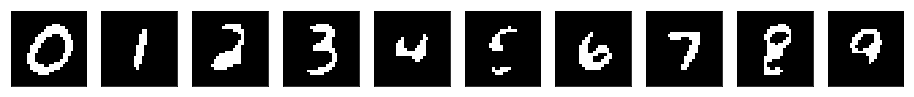

In [121]:
img = np.zeros(shape=(10,28,28))
print('Continuous')
for i in range(10):
      tr_mean[i] = (tr_mean[i] > 127).astype(int)
img = tr_mean.reshape(10,28,28)

fig, arrimg = plt.subplots(1, 10, figsize=(16, 16))
for dic in range(10):
    arrimg[dic].imshow(img[dic],cmap='gray')
    arrimg[dic].axes.get_xaxis().set_visible(False)
    arrimg[dic].axes.get_yaxis().set_visible(False)
plt.show

In [15]:
print('Continuous err : ',err/10000)

Continuous err :  0.1881


# Online Learning

# DataSet

In [2]:
import numpy as np
datasetOL = [[0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1],[0,1,1,0,1,0,1],[0,1,0,1,1,0,1,0,1,1,0,1],\
             [0,1,0,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0],[1,1,1,1,0,1,1,0,0,0,1,1,1,1,0],[1,0,1,1,1,0,1,1,1,0,0,0,1,1,0],\
             [1,0,1,0,0,1,0,1,1,1],[1,1,1,0,1,1,1,0,1,1,0],[0,1,0,0,0,1,1,1,1,0,1],[1,1,0,1,0,0,1,1,1],[0,1,1,0,1,0,1,0,1,1,1]]

In [3]:
priora = []
priorb = []
prioraa = [0]
priorbb = [0]
posteriora = [0]
posteriorb = [0]

for i in range(11):
    posteriorb.append(datasetOL[i].count(0) + posteriorb[i])
    posteriora.append(datasetOL[i].count(1) + posteriora[i])
del posteriora[0]
del posteriorb[0]

for i in range(11):
    priorbb.append(posteriorb[i])
    prioraa.append(posteriora[i])

for i in range(11):
    priorb.append(datasetOL[i].count(0)/len(datasetOL[i]))
    priora.append(datasetOL[i].count(1)/len(datasetOL[i]))

    
print(priora)
print(priorb)
print(prioraa)
print(priorbb)
print(posteriora)
print(posteriorb)

[0.5, 0.5714285714285714, 0.5833333333333334, 0.5789473684210527, 0.6666666666666666, 0.6, 0.6, 0.7272727272727273, 0.5454545454545454, 0.6666666666666666, 0.6363636363636364]
[0.5, 0.42857142857142855, 0.4166666666666667, 0.42105263157894735, 0.3333333333333333, 0.4, 0.4, 0.2727272727272727, 0.45454545454545453, 0.3333333333333333, 0.36363636363636365]
[0, 11, 15, 22, 33, 43, 52, 58, 66, 72, 78, 85]
[0, 11, 14, 19, 27, 32, 38, 42, 45, 50, 53, 57]
[11, 15, 22, 33, 43, 52, 58, 66, 72, 78, 85]
[11, 14, 19, 27, 32, 38, 42, 45, 50, 53, 57]


# Case : a=0, b=0

In [4]:
# [n! / m!(n-m)!]*(p^m)*(1-p)^(N-m)
def fac(num):
    fac = 1
    total = 0
    for i in range(1, num + 1):
        fac *= i
    return fac

lk = []
for i in range(11):
    lk.append(((fac(len(datasetOL[i])))/(fac(posteriora[i]-prioraa[i])*(fac(posteriorb[i]-priorbb[i]))))*(pow((priora[i]),posteriora[i]-prioraa[i]))*(pow((priorb[i]),posteriorb[i]-priorbb[i])))

In [12]:
print (lk)

[0.16818809509277344, 0.28185854280376926, 0.21679320778837105, 0.177054950555512, 0.1629561774817677, 0.20346893534617935, 0.24876221646022856, 0.1717592769604336, 0.2256985860868328, 0.24787507014096133, 0.2359250492356213]


In [5]:
for i in range(11):
    print('Case ', i ,' : ' , datasetOL[i])
    print('Likelihood :', lk[i])
    print('Beta prior :       a = ', prioraa[i] , ',   b = ',priorbb[i])
    print('Beta posterior : a = ', posteriora[i] , ',   b = ',posteriorb[i],'\n')

Case  0  :  [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
Likelihood : 0.16818809509277344
Beta prior :       a =  0 ,   b =  0
Beta posterior : a =  11 ,   b =  11 

Case  1  :  [0, 1, 1, 0, 1, 0, 1]
Likelihood : 0.29375515303997474
Beta prior :       a =  11 ,   b =  11
Beta posterior : a =  15 ,   b =  14 

Case  2  :  [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
Likelihood : 0.22860542417943364
Beta prior :       a =  15 ,   b =  14
Beta posterior : a =  22 ,   b =  19 

Case  3  :  [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]
Likelihood : 0.18286870706509092
Beta prior :       a =  22 ,   b =  19
Beta posterior : a =  33 ,   b =  27 

Case  4  :  [1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0]
Likelihood : 0.21430705488578314
Beta prior :       a =  33 ,   b =  27
Beta posterior : a =  43 ,   b =  32 

Case  5  :  [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0]
Likelihood : 0.20659760529408
Beta prior :       a =  43 ,   b =  32
Beta posterior : a =  52 ,   b

# Case : a=10, b=1

In [8]:
priora = []
priorb = []
prioraa = [10]
priorbb = [1]
posteriora = [10]
posteriorb = [1]

for i in range(11):
    posteriorb.append(datasetOL[i].count(0) + posteriorb[i])
    posteriora.append(datasetOL[i].count(1) + posteriora[i])
del posteriora[0]
del posteriorb[0]

for i in range(11):
    priorb.append(datasetOL[i].count(0)/(len(datasetOL[i])))
    priora.append(datasetOL[i].count(1)/(len(datasetOL[i])))
for i in range(11):
    priorbb.append(posteriorb[i])
    prioraa.append(posteriora[i])
    
print(priora)
print(priorb)
print(prioraa)
print(priorbb)
print(posteriora)
print(posteriorb)

[0.5, 0.5714285714285714, 0.5833333333333334, 0.5789473684210527, 0.6666666666666666, 0.6, 0.6, 0.7272727272727273, 0.5454545454545454, 0.6666666666666666, 0.6363636363636364]
[0.5, 0.42857142857142855, 0.4166666666666667, 0.42105263157894735, 0.3333333333333333, 0.4, 0.4, 0.2727272727272727, 0.45454545454545453, 0.3333333333333333, 0.36363636363636365]
[10, 21, 25, 32, 43, 53, 62, 68, 76, 82, 88, 95]
[1, 12, 15, 20, 28, 33, 39, 43, 46, 51, 54, 58]
[21, 25, 32, 43, 53, 62, 68, 76, 82, 88, 95]
[12, 15, 20, 28, 33, 39, 43, 46, 51, 54, 58]


In [9]:
lk = []
for i in range(11):
    lk.append(((fac(len(datasetOL[i])))/(fac(posteriora[i]-prioraa[i])*(fac(posteriorb[i]-priorbb[i]))))*(pow((priora[i]),posteriora[i]-prioraa[i]))*(pow((priorb[i]),posteriorb[i]-priorbb[i])))

In [10]:
for i in range(11):
    print('Case ', i ,' : ' , datasetOL[i])
    print('Likelihood :',lk[i])
    print('Beta prior :       a = ', prioraa[i] , ',   b = ',priorbb[i])
    print('Beta posterior : a = ', posteriora[i] , ',   b = ',posteriorb[i],'\n')

Case  0  :  [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
Likelihood : 0.16818809509277344
Beta prior :       a =  10 ,   b =  1
Beta posterior : a =  21 ,   b =  12 

Case  1  :  [0, 1, 1, 0, 1, 0, 1]
Likelihood : 0.29375515303997474
Beta prior :       a =  21 ,   b =  12
Beta posterior : a =  25 ,   b =  15 

Case  2  :  [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
Likelihood : 0.22860542417943364
Beta prior :       a =  25 ,   b =  15
Beta posterior : a =  32 ,   b =  20 

Case  3  :  [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]
Likelihood : 0.18286870706509092
Beta prior :       a =  32 ,   b =  20
Beta posterior : a =  43 ,   b =  28 

Case  4  :  [1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0]
Likelihood : 0.21430705488578314
Beta prior :       a =  43 ,   b =  28
Beta posterior : a =  53 ,   b =  33 

Case  5  :  [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0]
Likelihood : 0.20659760529408
Beta prior :       a =  53 ,   b =  33
Beta posterior : a =  62 ,   